In [2]:
import tweepy

In [3]:
consumer_key = 'guCU0VR5auH3gJwwDT9tf3Cf9'
consumer_secret = 'wepdcNlRaVwRL4tL8iuBlsA1iKHQy7ahEQW6DbazuHl1CpaX6H'

access_token = '150321726-QkHoEleE3sJQwUFx3Fjn4K3EXyGMXi27lFWnUeWD'
access_secret = '8Z6tAgC4blFqHJjJdMHsmhIT0RhwEGSvhGxPSbDnTNS90'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [16]:
followers_status = api.followers('narendramodi', count=200)
len(followers_status)

200

In [11]:
#followers_status[0]._json

In [18]:
#for follower in followers_status:
#    print(follower.name)

In [19]:
users = api.search_users('chowkidar', count=200)
len(users)

20

In [21]:
#for user in users:
#    print(user.name)

In [23]:
#api.rate_limit_status()

In [24]:
import os
os.getcwd()

'/Users/skathirmani/Projects/manipal/ds-batch6'

In [2]:
import glob
glob.glob('*.csv')

['jobs_datascience.csv', 'narendramodi_tweets.csv']

In [4]:
file_name = 'tweets_datascience.csv'
file_exists = file_name in glob.glob('*.csv')
file_exists

False

In [17]:
import pandas as pd
file_name = 'temp.csv'
file_exists = file_name in glob.glob('*.csv')

df = pd.DataFrame({'x': [1,2,3], 'y':[4,5,6]})

if file_exists:
    # Append the data
    with open(file_name, 'a') as f:
        df.to_csv(f, index=False, header=False)
else:
    # Create a new file
    df.to_csv(file_name, index=False)

# Data Quality

Types of data quality isses
- Missing values
- Outliers
- Redunancy
- Invalid format
    - numbers in strings
    - invalid date formats
    - Currency symbols along with number
    - Thousands separator
    - Inclusion of units
- Typos
- Encoding issues

In [26]:
# https://github.com/skathirmani/datasets -> naukri_jobs_datascience
naukri = pd.read_csv('/datasets/naukri_jobs_datascience.csv')
#naukri.head(5)

In [68]:
# naukri['experience'].unique()
x = naukri['experience'][0]

'4'

In [70]:
def temp(row):
    if type(row['experience']) == str:
        pass
    else:
        print(row.name, row['experience'])
naukri.head(1).apply(lambda row: temp(row), axis=1)

0    None
dtype: object

In [82]:
naukri['min_exp'] = naukri['experience'].apply( 
    lambda x: float('nan') if type(x)!=str else x.split(
        '-')[0]).astype(float)
naukri['max_exp'] = naukri['experience'].apply( 
    lambda x: float('nan') if type(x)!=str else x.split(
        '-')[1].split(' ')[0]).astype(float)

In [87]:
%matplotlib inline
#naukri['max_exp'].plot.box()

In [96]:
naukri[naukri['salary'].str.contains('Not disclosed')].shape

(3474, 13)

In [103]:
salaries = naukri[~naukri['salary'].str.contains('Not disclosed')]
salaries['salary_new'] = salaries['salary'].str.replace(',', '')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [154]:
salaries['is_salary'] = salaries['salary_new'].str.contains(
    '\d+ - \d+ P.A.')
salaries['min'] = salaries.apply(
    lambda row: row.salary_new.split(
        ' - ')[0] if row.is_salary else 'nan',axis=1).astype(float)
salaries['max'] = salaries.apply(
    lambda row: row.salary_new.split(' - ')[1].split(
        ' P.A.')[0] if row.is_salary else 'nan', axis=1).astype(float)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vie

In [160]:
salaries['min'].quantile([0, 0.25, 0.5, 0.75, 1]) / 100000

0.00     0.30
0.25     4.00
0.50     7.00
0.75    13.75
1.00    50.00
Name: min, dtype: float64

In [171]:
salaries['min_exp'].sort_values().unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 18., nan])

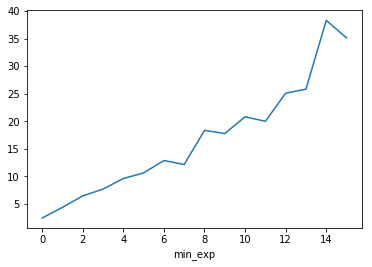

In [176]:
(salaries.groupby('min_exp')['min'].mean() / 100000).plot.line()

In [182]:
def exp_range(exp):
    if exp == 0:
        return 'Fresher1'
    elif exp > 0 and exp <= 2:
        return '0-2'
    elif exp > 2 and exp <= 5:
        return '2-5'
    elif exp >5 and exp <= 10:
        return '5-10'
    elif exp > 10 and exp <= 20:
        return '10-20'
    else:
        return 'Above 20'
salaries['exp_range'] = salaries['min_exp'].apply(exp_range)
(salaries.groupby(['exp_range'])['min'].mean() / 100000).sort_values()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


exp_range
Fresher1     2.439535
0-2          5.580275
2-5          9.083586
5-10        16.488095
10-20       29.760870
Above 20          NaN
Name: min, dtype: float64

In [185]:
a = [10, 10, 30, 50, 30, 50, 90, 101]
bins = [30, 60, 100]
import pandas as pd
import numpy as np
np.digitize(a, bins)

array([0, 0, 1, 1, 1, 1, 2, 3])

In [200]:
bins = [0.1, 2, 5, 10, 20]
# bin 0 : x < 0.1
# bin 1 : 0.1 >= x < 2
# bin 2: 2 >= x < 5
# bin 3: 5 >= x < 10
# bin 4: 10 >= x < 20
# bin 5: x > 20
salaries['exp_range'] = salaries['min_exp'].apply(
    lambda x: np.digitize(x, bins=bins)).replace({
    0: 'Freshers',
    1: '0-2',
    2: '2-5',
    3: '5-10',
    4: '10-20',
    5: 'Above 20'
})
(salaries.groupby(['exp_range','location'])[
    'min', 'max'].mean() / 100000).reset_index().sort_values(
    by=['exp_range','min'], ascending=False)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,exp_range,location,min,max
199,Freshers,Jaipur,8.000000,11.000000
194,Freshers,"Delhi NCR, Mumbai, Bengaluru, Pune",5.000000,10.000000
205,Freshers,"Mumbai, Bengaluru, Pune, Delhi NCR",4.500000,8.500000
204,Freshers,"Mumbai, Bengaluru, Pune",4.000000,7.666667
209,Freshers,Pune(Baner),4.000000,9.000000
200,Freshers,Mumbai,3.750000,5.000000
206,Freshers,Noida,3.500000,7.500000
192,Freshers,"Delhi NCR, Gurgaon",3.000000,6.000000
196,Freshers,"Delhi NCR, Noida, Dehradun",3.000000,5.500000
203,Freshers,Mumbai(Powai),3.000000,6.000000
